# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [8]:
# Load pickled data
import pickle
from sklearn.utils import shuffle

training_file = './train.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

ratio_train_validation = 0.75

split_point = int(len(y_train) * ratio_train_validation)
X_data, y_data = shuffle(X_train, y_train)

X_train = X_data[:split_point]
X_validation = X_data[split_point:]
y_train = y_data[:split_point]
y_validation = y_data[split_point:]

print("Train set size: ", len(X_train))
print("Validation set size: ", len(X_validation))

Train set size:  29406
Validation set size:  9803


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [32, 32]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 29406
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

1


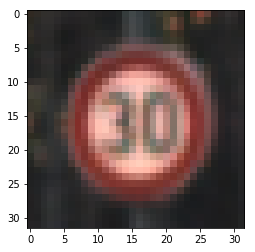

In [12]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

plt.imshow(X_train[500])
print(y_train[500])

#gray = tf.image.rgb_to_grayscale(X_test[500]) #grayscale conversion
#print(gray)
#plt.imshow(gray, cmap='gray')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [2]:
### Preprocess the data here.

def normalize(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    return [(-0.5 + x/255) for x in image_data]

X_train = normalize(X_train)
X_validation = normalize(X_validation)
X_test = normalize(X_test)

### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 10
BATCH_SIZE = 128

NameError: name 'X_train' is not defined

In [5]:
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x10.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 10), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(10))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x10. Output = 14x14x10.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x20.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 10, 20), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(20))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x20. Output = 5x5x20.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x20. Output = 500.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 500. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(500, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 240. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [6]:
# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Training Pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
top_3_pro = tf.nn.top_k(tf.nn.softmax(logits), k=3)
prediction_operation = tf.argmax(logits, 1)
correct_prediction = tf.equal(prediction_operation, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")

    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
             
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.817

EPOCH 2 ...
Validation Accuracy = 0.911

EPOCH 3 ...
Validation Accuracy = 0.943

EPOCH 4 ...
Validation Accuracy = 0.962

EPOCH 5 ...
Validation Accuracy = 0.975

EPOCH 6 ...
Validation Accuracy = 0.972

EPOCH 7 ...
Validation Accuracy = 0.980

EPOCH 8 ...
Validation Accuracy = 0.982

EPOCH 9 ...
Validation Accuracy = 0.980

EPOCH 10 ...
Validation Accuracy = 0.982

Model saved


In [7]:
print("Test set size: ", len(y_test))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test set size:  12630
Test Accuracy = 0.909


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I normalized the feature data.
I didn't change the image from RGB to grey because I think the color may contain important information. e,g. a green circle means passable and a red circle may means forbidden.

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.



### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I use a variable ratio_train_validation to decide how many data is used in the train set.
In above code, I set this ratio to 0.75. I simply shuffle the data and use the first 75% data as train set and the rest 25% as the validation set.

An alternative way is to use the cross-validation method. However, as we have a large set of data, it is not very necessary.

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I use the LeNet architecutre. There is 5 layers, two convolution layer and 3 full connect layer.

Convolution Layer Structure: A filter in size 5x5x3 move across the image. The weights of the filter is shared across the image, so it find the information for the same pattern in different position. I set the filter depth to 10. It may recongnize a part of circle, triangle, rectangle and their relative position. And also because of th weights sharing, the number of weights is greatly reduced. After apply the convolutional filer, we have an activation function "relu" to add non-linearity to the model. The pooling method is used for reduce the dimension. 

Full connect layer Struction: A traditional neural network struction, high dimension information is digested and classified to logits of length 43.

We have two convolution layer and three full connect layers, so the network is enough deep to recongnize complex signals.




In [12]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_



**Answer:**

I use softmax_cross_entropy_with_logits as the cost of mismatch. The target is to reduct this cost. Optimizer is the AdamOptimizer.

Batch size is 128 because from the last lab, number around 100 is proved be a good number.
Learning rate is 0.001. It is a small number but enough to get a stable accuracy after 10 epoch.

The initial weights are very important. They are initialized for a random value followed by Gaussian distribution (mean=0, mu=0.1). I tried to put the mu to 1 for a standard Gaussian distribution and the model is not converged sometimes. 


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I use the LeNet architecture. It is a good depature for image recognition. I simply increase the depth of the filter because I want to take considerate the information in colors.

***Layer 1: Convolutional.*** The output shape is 28x28x10.

***Activation.*** Relu.

***Pooling.*** The output shape is 14x14x10.

***Layer 2: Convolutional.*** The output shape is 10x10x20.

***Activation.*** Relu.

***Pooling.*** The output shape is 5x5x20.

***Flatten.*** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.

***Layer 3: Fully Connected.*** This have 240 outputs.

***Activation.*** Relu.

***Layer 4: Fully Connected.*** This have 120 outputs.

***Activation.*** Relu.

***Layer 5: Fully Connected (Logits).*** This have 43 outputs.

The validation accuracy is ~ 0.961. I'm satisfied with this result. However, the test accuracy is only ~ 0.887. Maybe the test set is different from train set ?


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Because I cannot use the cv2 come with. I installed the PIL library

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

X_data = []

for i in range(1, 6):
    pic = Image.open("./pic/" + str(i) + ".png")
    pic = pic.resize((32, 32))
    X_data.append(np.asarray(pic))

#%matplotlib inline

#plt.imshow(pix)

X_data = normalize(X_data)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = sess.run(prediction_operation, feed_dict={x: X_data}) 
    print(prediction)



ValueError: No variables to save

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

| Image  | Classified |
|--------|--------|
| ![](./pic/1.png)    | 38.Keep Right |
| ![](./pic/2.png)    | 13.Yield |
| ![](./pic/3.png)    | 17.No entry |
| ![](./pic/4.png)    | 35.Ahead only |
| ![](./pic/5.png)    | 37.Roundabout mandatory |

These images are taken from Google Map street view.

The model not well classify these images of Pedestrians


In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The test Accuracy is 91.3%


In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [5]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_3_res = sess.run(top_3_pro, feed_dict={x: X_data}) 
    print(top_3_res)

NameError: name 'saver' is not defined

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---
## Resubmission

#### Dataset exploration suggestion, Try to add the histograms showing the number of images for each of the class labels 

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   480.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 42 Patch objects>)

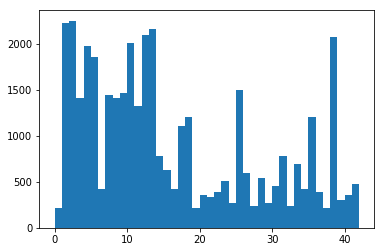

In [18]:
plt.hist(train["labels"], range(0, 43))

### Question Requirement

#### Please discuss how did you choose the optimzer. (Missed Answer)
    
Optimizer uses gradient descent optimization algorithms

Basic gradient descent: b = b - k * df/db  (if b is multi-dimensional, here should be the triangle reversed )

we call k the learning rate. During iterations, b takes steps proportinal to the negative of the gradient and will (hopefully) be stop in the local minimum point (df/db -> 0). In the model, we want to minimize the cost, so we choose gradient descent as the optimizer.
    
There are many gradient descent algorithms to improve the basic gradient descent method. Basically, they are considerate not only the gradient of this step, but a few steps in the past to make a smooth move. Here the algorithm chosen is called "Adaptive Moment Estimation"(Adam). Empirically Adam works well in practive.
    
    
#### Please discuss how did you tell a convolutional layer is well suited for this problem. (Missed Answer)

The interesting object in a picture may not always positioned in the same place. If we don't add a convolutional layer, pictures with object on left or on right generate totally different weights. With a convolutional layer, we add the "Translation invariance" to our model and reduce the total parameter number.


#### Please discuss how did you choose the particular activation (Missed Answer)

Relu is a recommeneded activation function. It have several advantages: simple, non-linear, continuous.


#### Please discuss how did you tune the hyperparameter. (Missed Answer)

Firstly, I use the hyperparameter recommended from the last quiz. 
I move one of them each time and re-train the model try to get a better accuracy result in the train set.

### Test a Model on New Images

#### Student documents the performance of the model when tested on the captured images and compares it to the results of testing on the dataset. (You have mentioned the test accuracy. But please compare it with your results from the test images)

The test accuracy is ~ 90%. I use 5 new images. 1 of them may not be in the original dataset (the pedestrians + bicycles image). 3 images are correctly recongnized so we get a total accuracy of 60%. 

The "Yield, No Entry, Ahead only" are simply images and correctly recognized. 
So I think the model may have difficuty on recognize complex image. So I print the test accuracy of "pedestrians" in the test set.

Test set size:  60
Test Accuracy = 0.467


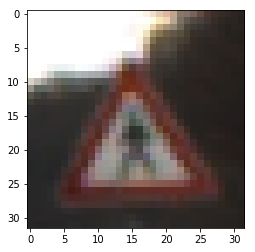

In [48]:
ped_indice = [i for i, value in enumerate(y_test) if value == 27]
ped_y_test = y_test[ped_indice]
ped_X_test = [x for i, x in enumerate(X_test) if i in ped_indice]

print("Test set size: ", len(ped_X_test))

plt.imshow(test['features'][ped_indice[0]])


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(ped_X_test, ped_y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


1. This proves that complex image like pedestrians are hard to be recongized
2. The "pedstrian" image in the dataset is different than the image I use... 

###  Please provide a discussion on the certainty and uncertainty of your models predictions and also some visualizations of the softmax probabilities of the predictions

| Image  | Classified Top1 | Classified Top2 | Classified Top3
|--------|--------|
| ![](./pic/1.png)    | 38.Keep Right (0.99) | 34 (0.01) | 40 (0.00)
| ![](./pic/2.png)    | 13.Yield (1.00) | 15 (0.00) | 9 (0.00)
| ![](./pic/3.png)    | 17.No entry (0.56) | 12. Priority road(0.44) | 14 (0.00)
| ![](./pic/4.png)    | 35.Ahead only (1.00) | 34 (0.00) | 38 (0.00) 
| ![](./pic/5.png)    | 40.Roundabout mandatory(0.56) | 38 Keep right (0.31) | 37 (0.13) 



The model very confidence on "Yield", and "Ahead only" 100%


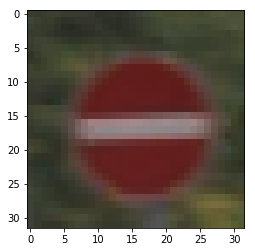

In [65]:
plt.imshow(test['features'][31])

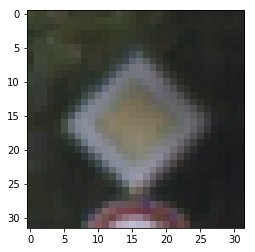

In [66]:
plt.imshow(test['features'][7])

I can't understand why the predicted top2 for the third image is "Priority Road" . They are so different...

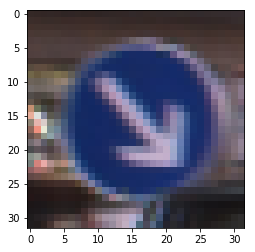

In [13]:
plt.imshow(test['features'][2])

Indeed, the "Keep Right" Sign is similar to the sign I provided. 
![](./pic/1.png)

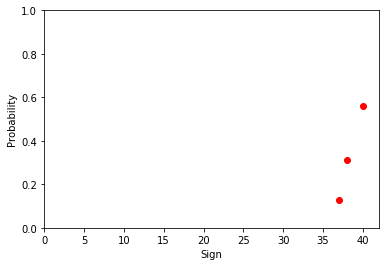

In [17]:
plt.plot([37, 38, 40], [0.13, 0.31, 0.56], "ro")
plt.axis([0, 42, 0, 1])
plt.xlabel('Sign')
plt.ylabel('Probability')